In [3]:
from utils.experiment import Experiment, get_experiments
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
#matplotlib inline
rcParams['figure.figsize'] = (8.0, 6.0)
%load_ext autoreload
%autoreload 2

# adapt to your computer
log_folder = "/home/rakrei/sequence_learning/plotting/plotting/logs"
#log_folder = "/home/rakrei/sequence_learning/plotting/plotting/logs"

In [18]:
# Show available experiments
list(get_experiments(log_folder).keys())

['moving_cup_0.5',
 'static_cup_0.5_5',
 'moving_cup_1.0_2',
 'static_cup_2.0',
 'two_blocks',
 'light_comparison_dark_0.75',
 'light_comparison_less_dark_1.0',
 'static_cup_0.5',
 'multi_blocks_1.0',
 'static_cup_0.5_4',
 'office_1.0',
 'static_cup_10.0_1',
 'grasshopper',
 'static_cup_10.0_2',
 'multi_blocks_0.5_1',
 'static_cup_0.5_3',
 'moving_cup_0.5_late_slow',
 'light_comparison_bright_0.75',
 'static_cup_1.5',
 'moving_cup_1.0_1',
 'moving_cup_0.5_late_cup',
 'light_comparison_even_less_dark_0.5',
 'static_cup_0.5_6',
 'static_cup_1.0_2',
 'three_blocks',
 'light_comparison_less_dark_0.75',
 'static_cup_1',
 'static_cup_2.5',
 'moving_cup_0.5_fast_cup',
 'static_cup_0.5_2',
 'static_cup_1.0_1',
 'static_cup_0.5_1',
 'multi_blocks_0.5_2',
 'light_comparison_less_dark_0.5',
 'static_cup_3.0']

In [11]:
exp = Experiment("random_parcour", log_folder=log_folder)
exp.experiment_name

'random_parcour_20161121T191100'

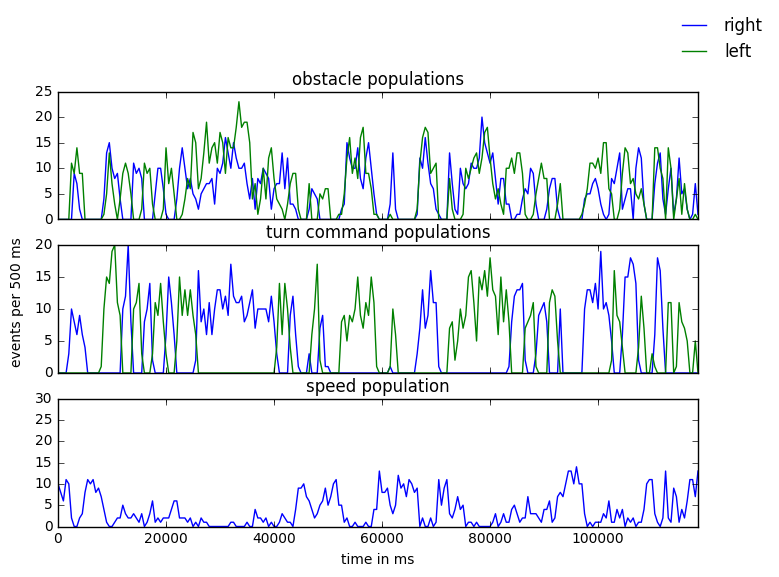

In [12]:
# correct timestamps
data_edvs = exp.df_edvs.copy()
data_robot = exp.df_robot.copy()
data_rolls = exp.df_rolls.copy()
data_edvs['timestamp'] = data_edvs['timestamp'] - 500
data_robot['timestamp'] = data_robot['timestamp'] - 500
data_rolls['timestamp'] = data_rolls['timestamp'] - 500

groups = {
    0: range(0,16),
    1: range(16,32),
    2: range(32,48),
    3: range(48,64),
    4: range(64,80),
    5: range(80,88),
}

def get_group(n):
    for k, v in groups.items():
        if n in v:
            return k
        
interval = 500        
        
rolls_frame = data_rolls
rolls_frame['group'] = rolls_frame['neuron'].apply(get_group)
rolls_frame['time_bin'] = np.floor(rolls_frame['timestamp'] / interval).astype(int) * interval
time_range = range(0,rolls_frame['time_bin'].max(), interval)
# Create a full index that doesn't skipping missing elements and let pandas set those to zero
index = pd.MultiIndex.from_product([groups.keys(), time_range], names=['groups', 'time_bins'])
firing_rates = rolls_frame.groupby(['group', 'time_bin']).size().reindex(index, fill_value=0)
    
gs = gridspec.GridSpec(3, 3)
gs.update(left=0.1, top=0.85)
fig = plt.figure(1)
ax1 = plt.subplot(gs[0, :])
ax1.title.set_text('obstacle populations')
firing_rates[0].plot(label='right', color='b')
firing_rates[1].plot(label='left', color='g')
leg = plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
#leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.05)
leg.get_frame().set_linewidth(0.0)
ax2 = plt.subplot(gs[1, :], sharex=ax1)
ax2.set_title('turn command populations')
firing_rates[2].plot(label='right', color='b')
firing_rates[3].plot(label='left', color='g')
ax3 = plt.subplot(gs[2, :], sharex=ax1)
ax3.set_title('speed population')
ax3.set_ylim(0, 30)
firing_rates[4].plot()
ax3.set_xlabel('time in ms')
#plt.tight_layout()
fig.text(0.04, 0.5, 'events per %s ms' % interval, va='center', rotation='vertical')
plt.show()

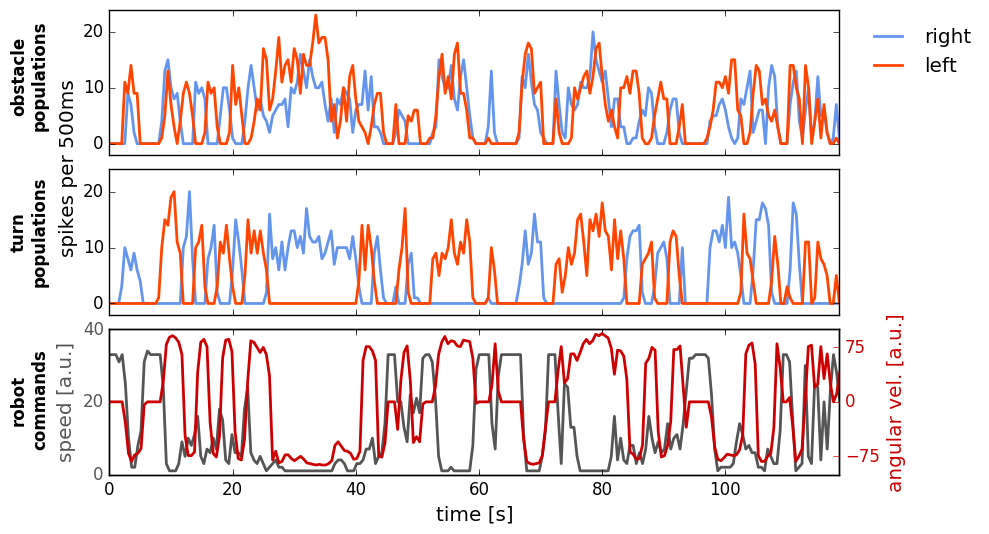

In [20]:
# edvs prints
timestamps = []



def edvs_image(timestamp):
    # get current axis
    ax = plt.gca()
    # get data
    data = exp.df_edvs[exp.df_edvs['timestamp'] > timestamp - 1000][exp.df_edvs['timestamp'] < timestamp]
    on_events = data[data['pol'] == 1]
    off_events = data[data['pol'] == 0]
    # plot
    ax.scatter(on_events['x'], on_events['y'], c='green', marker='.')
    ax.scatter(off_events['x'], off_events['y'], c='red', marker='.')
    #style
    ax.set_axis_bgcolor('white')
    ax.set_xlim(0, 128)
    ax.set_ylim(0, 128)
    ax.set_xticks([])
    ax.set_yticks([])
    # add rectangle for obstacle view window
    ax.add_patch(patches.Rectangle((23, 0),
        104-23,
        65,
        fill=False      # remove background
    )
)

fig = plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(3, 5) 
gs.update(left=0.12, right=0.85, hspace=0.1)

row_title_style = {
    'va': 'center',
    'ha': 'center',
    'rotation': 'vertical',
    'size': 'large',
    'weight': 'bold'
}

plot_style = {
    'lw': 2
}

label_style = {
    'size': 'x-large'
}

number_style = {
    'size': 'x-large'
}

tick_style = {
    'labelsize': 'large'
}

# obstacle populations
ax1 = plt.subplot(gs[0, :])
firing_rates[0].plot(label='right', color='#6495ed', **plot_style)
firing_rates[1].plot(label='left', color='#ff4500', **plot_style)
ax1.set_ylim(-2, 24)
ax1.set_yticks([0, 10, 20])
# ax1.set_ylim(-2, 18)
# ax1.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax1.get_ylim()[0], ax1.get_ylim()[1], linewidth=3)
fig.text(0.04, 0.79, 'obstacle\npopulations', **row_title_style)
# leg = plt.legend(bbox_to_anchor=(1, 1))
leg = plt.legend(bbox_to_anchor=(1, 0.9), bbox_transform=plt.gcf().transFigure, prop={'size':'x-large'})
leg.get_frame().set_linewidth(0.0)

# turn populations
ax15 = plt.subplot(gs[1, :], sharex=ax1)
firing_rates[2].plot(label='right', color='#6495ed', **plot_style)
firing_rates[3].plot(label='left', color='#ff4500', **plot_style)
ax15.set_ylim(-2, 24)
ax15.set_yticks([0, 10, 20])
# ax15.set_ylim(-2, 18)
# ax15.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
fig.text(0.04, 0.53, 'turn\npopulations', **row_title_style)
fig.text(0.07, 0.76, 'spikes per 500ms', rotation='vertical', **label_style)

# robot commands
ax2 = plt.subplot(gs[2, :], sharex=ax1)
data_robot.set_index('timestamp')['forward_velocity'].plot(color='#555555', **plot_style)
ax2.set_ylabel('speed [a.u.]', color='#555555', **label_style)
ax2.tick_params(axis='y', colors='#555555')
ax2.set_xlabel('time [s]', **label_style)
ax2.set_yticks([0, 20, 40])
ax3 = ax2.twinx()
data_robot.set_index('timestamp')['angular_velocity'].plot(color='#cc0000', **plot_style)
ax3.set_ylabel('angular vel. [a.u.]', color='#cc0000', **label_style)
ax3.set_yticks([-75, 0, 75])
ax3.tick_params(axis='y', colors='#cc0000')
ax2.set_xlim(0, firing_rates[0].index.max())
# ax2.set_xlim(0, 8000)
#relabel to seconds
ax2.set_xticklabels(["{:.0f}".format(x/1000) for x in ax2.get_xticks()])
for timestamp in timestamps:
    plt.vlines(timestamp, ax3.get_ylim()[0], ax3.get_ylim()[1], linewidth=3)
fig.text(0.04, 0.25, 'robot\ncommands', **row_title_style)

ax1.tick_params(**tick_style)
ax15.tick_params(**tick_style)
ax2.tick_params(**tick_style)
ax3.tick_params(**tick_style)

# fig.text(0.44, 0.86, '1', **number_style)
# fig.text(0.585, 0.86, '2', **number_style)
# fig.text(0.73, 0.86, '3', **number_style)
plt.show()



In [40]:
exp.df_robot

,timestamp,left,right,forward_velocity,angular_velocity
0,-2484,25,-4,25,-4
1,-1966,33,0,33,0
2,-1448,33,0,33,0
3,-926,33,0,33,0
4,-405,33,0,33,0
5,116,33,0,33,0
6,638,33,0,33,0
7,1153,33,0,33,0
8,1656,24,-27,24,-27
9,2157,11,-66,11,-66


In [10]:
firing_rates.max()

16